In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()

In [4]:
raw = pd.read_csv('application_train.csv')
pd.set_option('display.max_columns', None)
raw

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Text(0, 0.5, 'Frequency of Target')

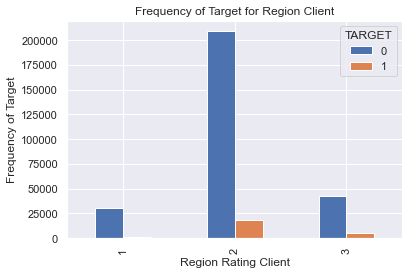

In [5]:
%matplotlib inline
pd.crosstab(raw.REGION_RATING_CLIENT, raw.TARGET).plot(kind='bar')
plt.title('Frequency of Target for Region Client')
plt.xlabel('Region Rating Client')
plt.ylabel('Frequency of Target')

Text(0, 0.5, 'Frequency of Target')

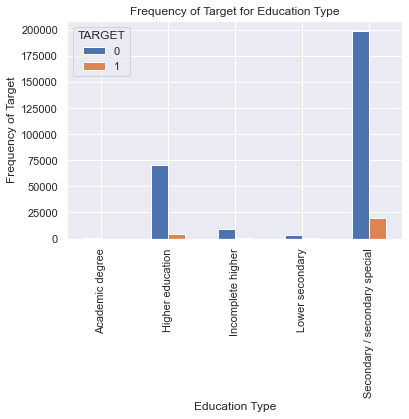

In [10]:
%matplotlib inline
pd.crosstab(raw.NAME_EDUCATION_TYPE, raw.TARGET).plot(kind='bar')
plt.title('Frequency of Target for Education Type')
plt.xlabel('Education Type')
plt.ylabel('Frequency of Target')

In [6]:
raw.REGION_RATING_CLIENT.value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

In [4]:
col_to_drop = [
    'NAME_CONTRACT_TYPE','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED', 'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH', 'OWN_CAR_AGE','REGION_POPULATION_RELATIVE', 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG','BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
    'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
    'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
    'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
    'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
    'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
    'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
    'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'
]

In [5]:
raw_drop = raw.drop(col_to_drop, axis=1)

In [6]:
raw_drop.groupby('TARGET').mean()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
TARGET,,,,,,,,,,,
0,278244.744536,0.412946,169077.722266,-16138.176397,0.999996,0.814653,0.195991,0.998129,0.284238,0.056840,2.150154
1,277449.167936,0.463807,165611.760906,-14884.828077,1.000000,0.879517,0.237825,0.998187,0.244955,0.055347,2.181269


In [7]:
raw_drop['Age'] = abs((raw_drop['DAYS_BIRTH']/365))

In [8]:
raw_drop['Age'] = raw_drop['Age'].astype(int)

In [9]:
raw_drop['OCCUPATION_TYPE'].fillna('others',inplace=True)

In [10]:
raw_drop = raw_drop.replace('XNA',)

In [11]:
raw_drop.isnull().sum()

SK_ID_CURR                0
TARGET                    0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_TYPE_SUITE        1292
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
FLAG_MOBIL                0
FLAG_EMP_PHONE            0
FLAG_WORK_PHONE           0
FLAG_CONT_MOBILE          0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE           0
CNT_FAM_MEMBERS           2
Age                       0
dtype: int64

In [ ]:
sns.countplot(x=raw_drop['target'], data=raw_drop['TARGET'])
plt.show()

Text(0, 0.5, 'Frequency of Target')

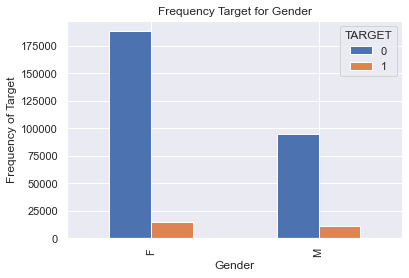

In [24]:
%matplotlib inline
pd.crosstab(raw_drop.CODE_GENDER, raw_drop.TARGET).plot(kind='bar')
plt.title('Frequency Target for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Target')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='Count'>

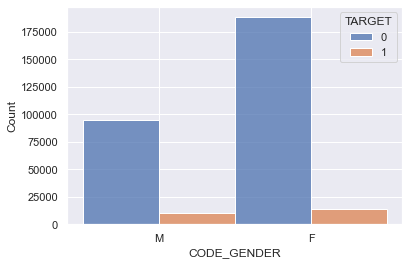

In [30]:
sns.histplot(data=raw_drop['TARGET'], x=raw_drop['CODE_GENDER'], hue=raw_drop['TARGET'], multiple="dodge")

Text(0, 0.5, 'Frequency of Target')

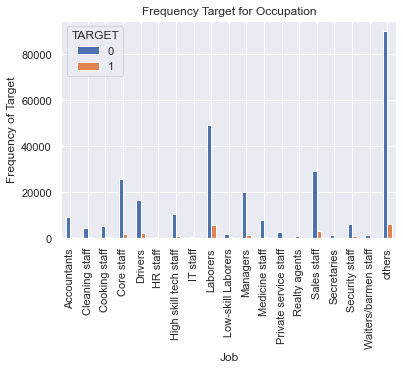

In [14]:
%matplotlib inline
pd.crosstab(raw_drop.OCCUPATION_TYPE, raw_drop.TARGET).plot(kind='bar')
plt.title('Frequency Target for Occupation')
plt.xlabel('Job')
plt.ylabel('Frequency of Target')
#plt.savefig('purchase_fre_job')

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='Count'>

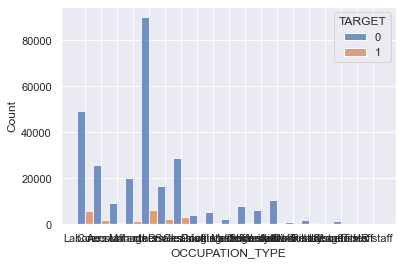

In [31]:
sns.histplot(data=raw_drop['TARGET'], x=raw_drop['OCCUPATION_TYPE'], hue=raw_drop['TARGET'], multiple="dodge")

Text(0, 0.5, 'Frequency of Target')

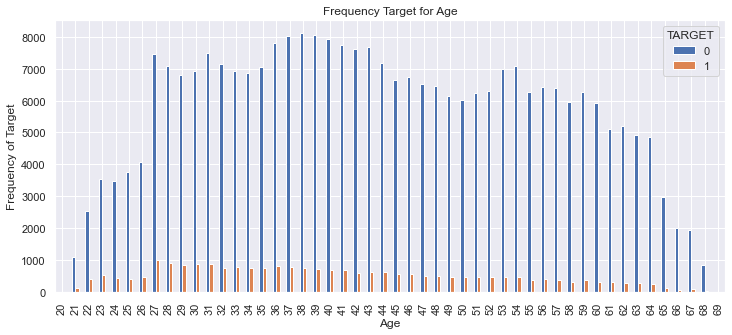

In [35]:
%matplotlib inline
pd.crosstab(raw_drop.Age, raw_drop.TARGET).plot(kind='bar', figsize=(12,5))
plt.title('Frequency Target for Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Target')

Text(0, 0.5, 'Frequency of Target')

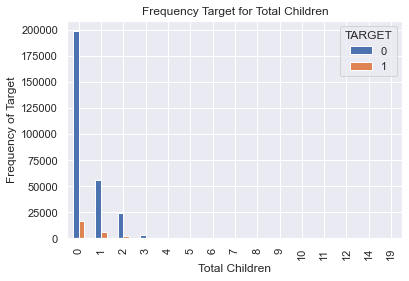

In [26]:
%matplotlib inline
pd.crosstab(raw_drop.CNT_CHILDREN, raw_drop.TARGET).plot(kind='bar')
plt.title('Frequency Target for Total Children')
plt.xlabel('Total Children')
plt.ylabel('Frequency of Target')

In [38]:
#raw_drop.CNT_CHILDREN.count_values()

Text(0, 0.5, 'Proportion of Target')

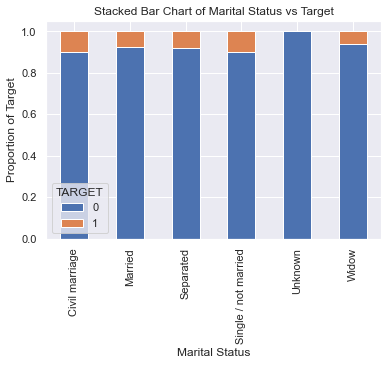

In [20]:
table = pd.crosstab(raw_drop.NAME_FAMILY_STATUS, raw_drop.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Target')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Target')
#plt.savefig('mariral_vs_pur_stack')

Text(0, 0.5, 'Proportion of Target')

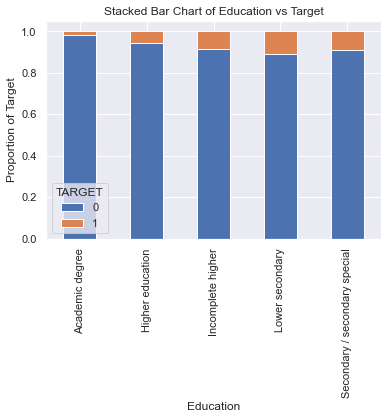

In [19]:
table=pd.crosstab(raw_drop.NAME_EDUCATION_TYPE, raw_drop.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Target')
plt.xlabel('Education')
plt.ylabel('Proportion of Target')
#plt.savefig('edu_vs_pur_stack')


Text(0, 0.5, 'Proportion of Target')

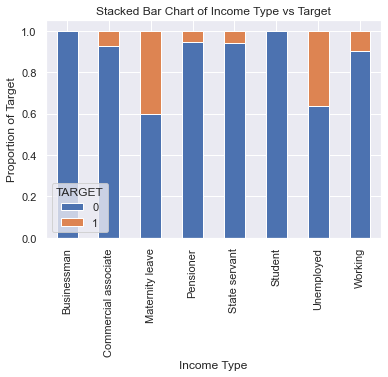

In [23]:
table=pd.crosstab(raw_drop.NAME_INCOME_TYPE, raw_drop.TARGET)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Income Type vs Target')
plt.xlabel('Income Type')
plt.ylabel('Proportion of Target')

Text(0, 0.5, 'Frequency')

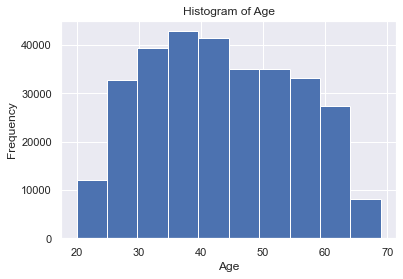

In [21]:
raw_drop.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('hist_age')

Text(0, 0.5, 'Frequency')

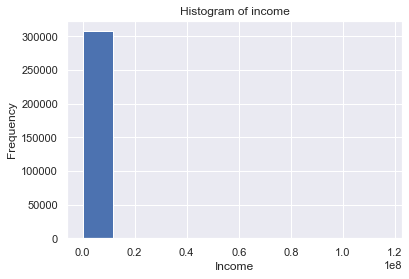

In [25]:
raw_drop.AMT_INCOME_TOTAL.hist()
plt.title('Histogram of income')
plt.xlabel('Income')
plt.ylabel('Frequency')

In [ ]:
raw.info()

In [ ]:
raw_drop.info()

In [ ]:
bureau_id = pd.read_csv('bureau.csv')
pd.set_option('display.max_columns', None)

In [ ]:
raw_bureau_id = pd.merge(raw_drop,bureau_id['SK_ID_BUREAU'], left_index=True, right_index=True, how='inner')
#result = pd.merge(left, right, left_index=True, right_index=True, how="inner")

In [41]:
bureau_balance = pd.read_csv('bureau_balance.csv')
pd.set_option('display.max_columns', None)
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [ ]:
bureau_balance['STATUS'].unique()

In [ ]:
bureau_balance['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
bureau_balance['STATUS'] = bureau_balance['STATUS'].astype(int)

In [ ]:
bureau_balance['STATUS'].unique()

In [ ]:
bureau_balance['STATUS']

In [ ]:
raw_bureau_balance = pd.merge(raw_bureau_id,bureau_balance[['MONTHS_BALANCE','STATUS']], left_index=True, right_index=True, how='inner')

In [ ]:
raw_bureau_balance.info(verbose = True, show_counts = True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=raw_bureau_balance.TARGET)
plt.show()

In [ ]:
raw_bureau_balance = raw_bureau_balance.drop(['SK_ID_CURR', 'SK_ID_BUREAU'], axis=1)

In [ ]:
raw_bureau_balance.CODE_GENDER.value_counts()

In [ ]:
raw_bureau_balance.CODE_GENDER.value_counts()

In [ ]:
raw_bureau_balance = pd.get_dummies(raw_bureau_balance, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], drop_first = True)

In [ ]:
raw_bureau_balance

In [ ]:
raw_train

In [60]:
raw_train.groupby('TARGET').mean()

,Age,Gender,Total_Children,Income,STATUS,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
TARGET,,,,,,,,,,,,,,,,
0,43.713123,0.333957,0.412946,169077.722266,4.448063,0.343176,0.694513,-16138.176397,0.999996,0.814653,0.195991,0.998129,0.284238,0.056840,2.150154,-29.172856
1,40.279960,0.429204,0.463807,165611.760906,4.443182,0.305176,0.684109,-14884.828077,1.000000,0.879517,0.237825,0.998187,0.244955,0.055347,2.181269,-29.619899


In [64]:
raw_train.groupby('TARGET').median()

,Age,Gender,Total_Children,Income,STATUS,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
TARGET,,,,,,,,,,,,,,,,
0,43.0,0.0,0.0,148500.0,6.0,0.0,1.0,-15877.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,-24.0
1,39.0,0.0,0.0,135000.0,6.0,0.0,1.0,-14282.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,-24.0


In [66]:
raw_train.isnull().sum()

TARGET                    0
Age                       0
Gender                    0
Total_Children            0
Income                    0
Education                 0
Occupation            96391
STATUS                    0
NAME_TYPE_SUITE        1292
NAME_INCOME_TYPE          0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
FLAG_OWN_CAR_Y            0
FLAG_OWN_REALTY_Y         0
DAYS_BIRTH                0
FLAG_MOBIL                0
FLAG_EMP_PHONE            0
FLAG_WORK_PHONE           0
FLAG_CONT_MOBILE          0
FLAG_PHONE                0
FLAG_EMAIL                0
CNT_FAM_MEMBERS           2
MONTHS_BALANCE            0
dtype: int64

In [ ]:
colnames_reordered = 

In [ ]:
from sklearn import preprocessing

In [ ]:
raw_bureau_balance = pd.get_dummies(raw_bureau_balance, columns=['NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE'], drop_first=True)


column_data = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE']
for col in column_data:
    label = preprocessing.LabelEncoder()
    raw_bureau_balance[col] = label.fit_transform(raw_bureau_balance[col].values)

In [ ]:
raw_bureau_balance

In [ ]:
raw_bureau_balance = raw_bureau_balance.drop(['DAYS_BIRTH'], axis=1)

In [ ]:
train = raw_bureau_balance.copy()

In [ ]:
train

In [ ]:
#train.to_csv('test_.csv')